# Firearm Detection using Faster RCNN Model

In [ ]:
import sys
sys.path.append('../input/torchvisionreferencedetection/torchvision-reference-derection')

# Install necessary packages

In [ ]:
!pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 13.4 MB/s eta 0:00:00


In [ ]:
pip install albumentations


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.4/150.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 43.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install torch torchvision torchaudio


In [ ]:
!pip install torch --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 21.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 40.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 48.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 40.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 27.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 36.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━

# Import necessary libraries

In [ ]:
import os
import torch
import torchvision
import numpy as np
import pandas as pd
import cv2
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2
from engine import train_one_epoch, evaluate

# Model Training and Validation

In [ ]:
train_csv_path = "train_data_finetuning_final.csv"
val_csv_path = "val.csv"
train_images = "train_data_finetune"
val_images = "val_data"

In [ ]:
train_csv = pd.read_csv(train_csv_path)
train_csv.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image24482.jpg,Machine_Gun,845.333333,433.000000,999.166666,501.666667
1,Image68673.jpg,NoGun,0.000000,0.000000,0.000000,0.000000
2,Image11064.jpg,Machine_Gun,1479.749991,374.000001,1559.999992,620.000002
3,Image30314.jpg,Machine_Gun,1544.818177,400.545455,1727.727269,451.363638
4,Image51439.jpg,HandGun,478.333333,110.333333,515.000000,162.333333


In [ ]:
train_csv.shape

(56655, 6)

In [ ]:
# Remove rows where the class is 'NoGun'
filtered_df = train_csv[train_csv['class'] != 'NoGun']
filtered_df.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image24482.jpg,Machine_Gun,845.333333,433.000000,999.166666,501.666667
2,Image11064.jpg,Machine_Gun,1479.749991,374.000001,1559.999992,620.000002
3,Image30314.jpg,Machine_Gun,1544.818177,400.545455,1727.727269,451.363638
4,Image51439.jpg,HandGun,478.333333,110.333333,515.000000,162.333333
5,Image51179.jpg,HandGun,346.200000,238.400000,362.400000,259.000000


In [ ]:
filtered_df.shape

(34182, 6)

In [ ]:
val_csv = pd.read_csv(test_csv_path)
val_csv.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image44643.jpg,HandGun,596.500010,353.916668,678.583344,416.666668
1,Image60308.jpg,HandGun,1689.666667,145.000000,1763.666667,235.000000
2,Image36521.jpg,HandGun,0.000000,383.000000,63.000000,449.000000
3,Image7424.jpg,NoGun,0.000000,0.000000,0.000000,0.000000
4,Image41696.jpg,HandGun,23.500000,365.500000,62.500000,404.000000


In [ ]:
val_csv.shape

(7070, 6)

In [ ]:
# Remove rows where the class is 'NoGun'
filtered_df_val = val_csv[val_csv['class'] != 'NoGun']
filtered_df_val.head()

,image_name,class,xmin,ymin,xmax,ymax
0,Image44643.jpg,HandGun,596.500010,353.916668,678.583344,416.666668
1,Image60308.jpg,HandGun,1689.666667,145.000000,1763.666667,235.000000
2,Image36521.jpg,HandGun,0.000000,383.000000,63.000000,449.000000
4,Image41696.jpg,HandGun,23.500000,365.500000,62.500000,404.000000
5,Image54696.jpg,HandGun,291.000000,341.000000,310.000000,375.000000


In [ ]:
filtered_df_val.shape

(4260, 6)

## We have 2 classes Machine_Gun and HandGun as our classification label for object detection along with their bounding boxes

In [ ]:
categories = filtered_df["class"].unique()
print(categories)

['Machine_Gun' 'HandGun']


In [ ]:
class LabelMap:
    def __init__(self, categories):
        self.map_dict = {}
        self.reverse_map_dict={}
        for i, cat in enumerate(categories):
            self.map_dict[cat] = i + 1
            self.reverse_map_dict[i] = cat
    def fit(self, df, column):
        df[column] = df[column].map(self.map_dict)
        return df

In [ ]:
label_map = LabelMap(categories)

In [ ]:
train_data = label_map.fit(filtered_df, "class")
train_data.head()

/tmp/ipykernel_10327/1206415338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(self.map_dict)


,image_name,class,xmin,ymin,xmax,ymax
0,Image24482.jpg,1,845.333333,433.000000,999.166666,501.666667
2,Image11064.jpg,1,1479.749991,374.000001,1559.999992,620.000002
3,Image30314.jpg,1,1544.818177,400.545455,1727.727269,451.363638
4,Image51439.jpg,2,478.333333,110.333333,515.000000,162.333333
5,Image51179.jpg,2,346.200000,238.400000,362.400000,259.000000


In [ ]:
val_data = label_map.fit(filtered_df_val, "class")

val_data.head()


/tmp/ipykernel_10327/1206415338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(self.map_dict)


,image_name,class,xmin,ymin,xmax,ymax
0,Image44643.jpg,2,596.500010,353.916668,678.583344,416.666668
1,Image60308.jpg,2,1689.666667,145.000000,1763.666667,235.000000
2,Image36521.jpg,2,0.000000,383.000000,63.000000,449.000000
4,Image41696.jpg,2,23.500000,365.500000,62.500000,404.000000
5,Image54696.jpg,2,291.000000,341.000000,310.000000,375.000000


In [ ]:
class GunDataset(torch.utils.data.Dataset):
    def __init__(self, df, image_path, categories, transforms=None,**kwargs):
        super().__init__(**kwargs)
        self.df = df
        self.image_path = image_path
        self.categories = categories
        self.images = self.df["image_name"].unique()
        self.transforms = transforms
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_file = os.path.join(self.image_path, self.images[idx])
        img = cv2.imread(image_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32)
        img = img/255.0
        image_data = self.df[self.df['image_name'] == self.images[idx]]
        labels = torch.as_tensor(image_data["class"].values, dtype=torch.int64)
        xmins = image_data["xmin"].values
        ymins = image_data["ymin"].values
        xmaxs = image_data["xmax"].values
        ymaxs = image_data["ymax"].values
        boxes = torch.as_tensor(np.stack([xmins, ymins, xmaxs, ymaxs], axis=1), dtype=torch.float32)
        areas = (boxes[:,3] - boxes[:,1]) * (boxes[:,2] - boxes[:,0])
        areas = torch.as_tensor(areas, dtype=torch.float32)
        image_id = torch.tensor([idx])
        iscrowd = torch.zeros((len(labels),), dtype=torch.int64)
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = areas
        target["iscrowd"] = iscrowd
        if self.transforms is not None:
            transformed = self.transforms(image=img, bboxes=boxes, labels=labels)
            img = transformed["image"]
            target["boxes"] = torch.as_tensor(transformed["bboxes"],dtype=torch.float32)
        return torch.as_tensor(img, dtype=torch.float32), target

In [ ]:
transform_train = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    ToTensorV2(p=1)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

In [ ]:
transform_test = A.Compose([
    ToTensorV2(p=1)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
train_dataset = GunDataset(train_data, train_images, categories, transform_train)
val_dataset = GunDataset(val_data, val_images, categories, transform_test)

In [ ]:
data_loader_train = torch.utils.data.DataLoader(
        train_dataset, batch_size=4, shuffle=True, num_workers=0,
        collate_fn=collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    val_dataset, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=collate_fn)

# Plotting images to show the annotations in the training sets are intact.

In [ ]:
def plot_images(images, targets):
    for image, target in zip(images, targets):
        sample = image.permute(1,2,0).cpu().numpy()
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
        boxes = target["boxes"].cpu().numpy().astype(np.int32)
        for box in boxes:
            cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (220, 0, 0), 3)
        ax.set_axis_off()
        ax.imshow(sample)

In [ ]:
images, targets = next(iter(data_loader_train))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


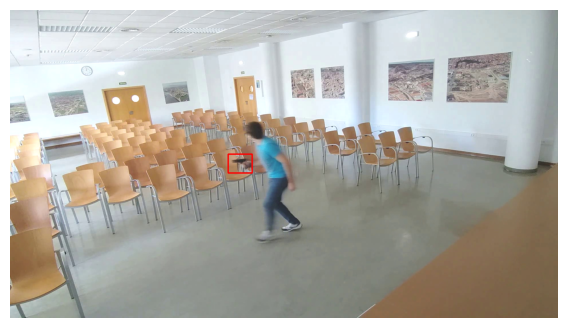

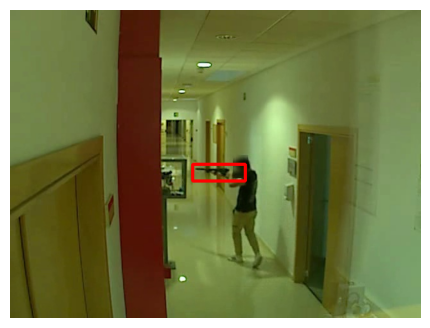

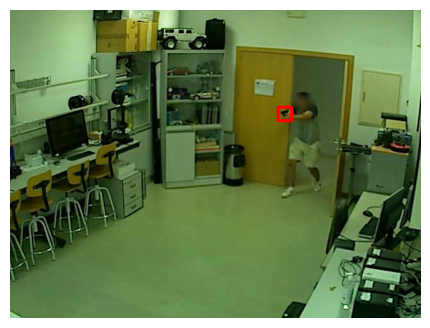

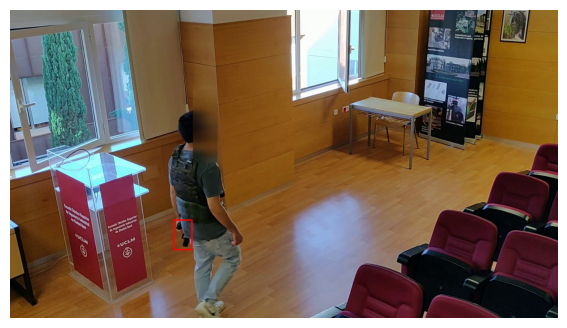

In [ ]:
plot_images(images, targets)

# Plotting images to show the annotations in the validation sets are intact.

In [ ]:
images, targets = next(iter(data_loader_test))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


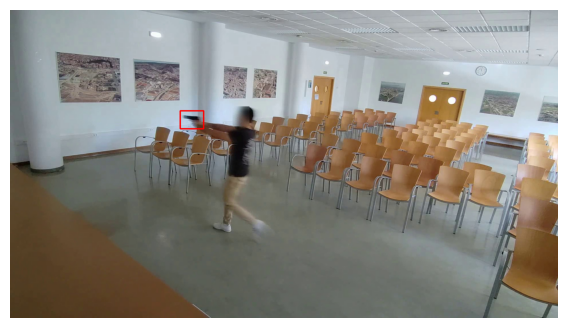

In [ ]:
plot_images(images, targets)

# Downlaod the pretrained Faster R-CNN model from torchvision provided by Pytotch


In [ ]:
detection_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


##The Faster R-CNN model is trained on the COCO dataset, which includes 91 classes (including the background). For our firearm detection use case, we need to modify the output layer to accommodate three classes: Machine Gun, Handgun, and background. Additionally, we need to update the input features of the output layer accordingly.

In [ ]:
num_classes = len(categories)+1

In [ ]:
in_features = detection_model.roi_heads.box_predictor.cls_score.in_features
detection_model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
detection_model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

# Train the Modified Fater R-CNN Model for Firearm Detection

In [ ]:
def training(model, train_loader, val_loader, epochs=10):
    # construct an optimizer
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)
    # and a learning rate scheduler
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                   step_size=3,
                                                   gamma=0.1)
    for epoch in range(epochs):
        # train for one epoch, printing every 10 iterations
        train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
        # update the learning rate
        lr_scheduler.step()
        # evaluate on the test dataset
        evaluate(model, val_loader, device=device)

In [ ]:
training(detection_model, data_loader_train, data_loader_test, epochs=10 )

Epoch: [0]  [   0/8546]  eta: 1:38:23  lr: 0.000010  loss: 1.5664 (1.5664)  loss_classifier: 1.4137 (1.4137)  loss_box_reg: 0.0364 (0.0364)  loss_objectness: 0.0973 (0.0973)  loss_rpn_box_reg: 0.0189 (0.0189)  time: 0.6908  data: 0.1505  max mem: 4826
Epoch: [0]  [  10/8546]  eta: 0:48:21  lr: 0.000060  loss: 1.5333 (1.4794)  loss_classifier: 1.4038 (1.3519)  loss_box_reg: 0.0471 (0.0504)  loss_objectness: 0.0727 (0.0677)  loss_rpn_box_reg: 0.0069 (0.0094)  time: 0.3400  data: 0.1158  max mem: 5005
Epoch: [0]  [  20/8546]  eta: 0:46:46  lr: 0.000110  loss: 1.1606 (1.1319)  loss_classifier: 1.0357 (1.0064)  loss_box_reg: 0.0471 (0.0500)  loss_objectness: 0.0672 (0.0672)  loss_rpn_box_reg: 0.0066 (0.0083)  time: 0.3110  data: 0.1122  max mem: 5005
Epoch: [0]  [  30/8546]  eta: 0:45:12  lr: 0.000160  loss: 0.3429 (0.8543)  loss_classifier: 0.2184 (0.7294)  loss_box_reg: 0.0388 (0.0496)  loss_objectness: 0.0661 (0.0671)  loss_rpn_box_reg: 0.0066 (0.0082)  time: 0.3067  data: 0.1082  max me

/opt/conda/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: [0]  [8545/8546]  eta: 0:00:00  lr: 0.005000  loss: 0.0757 (0.1002)  loss_classifier: 0.0185 (0.0327)  loss_box_reg: 0.0499 (0.0624)  loss_objectness: 0.0004 (0.0027)  loss_rpn_box_reg: 0.0013 (0.0023)  time: 0.3221  data: 0.1235  max mem: 5056
Epoch: [0] Total time: 1:09:40 (0.4891 s / it)
creating index...
index created!
Test:  [   0/4260]  eta: 0:31:00  model_time: 0.3316 (0.3316)  evaluator_time: 0.0017 (0.0017)  time: 0.4368  data: 0.0932  max mem: 5056


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Test:  [ 100/4260]  eta: 0:03:33  model_time: 0.0218 (0.0252)  evaluator_time: 0.0011 (0.0011)  time: 0.0489  data: 0.0233  max mem: 5056
Test:  [ 200/4260]  eta: 0:03:10  model_time: 0.0199 (0.0228)  evaluator_time: 0.0011 (0.0011)  time: 0.0402  data: 0.0178  max mem: 5056
Test:  [ 300/4260]  eta: 0:03:03  model_time: 0.0210 (0.0223)  evaluator_time: 0.0010 (0.0011)  time: 0.0471  data: 0.0221  max mem: 5056
Test:  [ 400/4260]  eta: 0:02:58  model_time: 0.0207 (0.0222)  evaluator_time: 0.0011 (0.0011)  time: 0.0426  data: 0.0187  max mem: 5056
Test:  [ 500/4260]  eta: 0:02:50  model_time: 0.0202 (0.0219)  evaluator_time: 0.0010 (0.0011)  time: 0.0423  data: 0.0195  max mem: 5056
Test:  [ 600/4260]  eta: 0:02:44  model_time: 0.0207 (0.0216)  evaluator_time: 0.0011 (0.0011)  time: 0.0504  data: 0.0256  max mem: 5056
Test:  [ 700/4260]  eta: 0:02:40  model_time: 0.0208 (0.0216)  evaluator_time: 0.0011 (0.0011)  time: 0.0496  data: 0.0244  max mem: 5056
Test:  [ 800/4260]  eta: 0:02:36  

##Save the Model for Testing and Inference

In [ ]:
torch.save(detection_model.state_dict(), 'fasterrcnn_resnet50_finetuned_fpn.pth')

##Validating the Model with MAP score

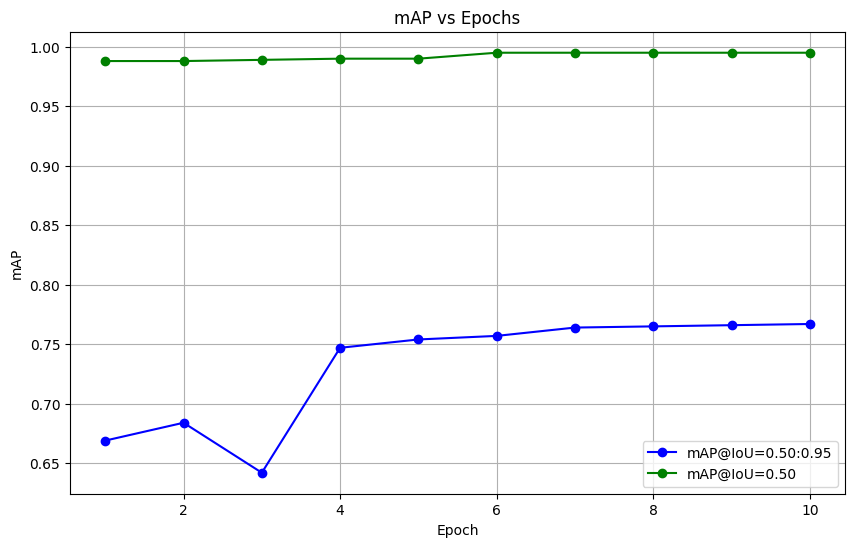

In [ ]:
import matplotlib.pyplot as plt

# Data for each epoch and mAP scores
epochs = list(range(1, 11))
map_iou_50_95 = [0.669, 0.684, 0.642, 0.747, 0.754, 0.757, 0.764, 0.765, 0.766, 0.767]
map_iou_50 = [0.988, 0.988, 0.989, 0.990, 0.990, 0.995, 0.995, 0.995, 0.995, 0.995]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, map_iou_50_95, label='mAP@IoU=0.50:0.95', color='blue', marker='o')
plt.plot(epochs, map_iou_50, label='mAP@IoU=0.50', color='green', marker='o')

# Adding titles and labels
plt.title('mAP vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()